# Logistic Regression

现在我们来回忆一下线性回归
$$ J = \frac{1}{2} \sum_{i=1}^n(h_\theta(x^{(i)}-y^{(i)})^2$$

再来看一下逻辑回归的结论：
$$Likelihood(\theta) = \sum_{i=1}^n log(h_\theta(x^{(i)})  +(1-y^{(i)}*log(1-h_\theta(x^{(i)})))) $$

上面的Likelihood简写L_theta，我们叫这个式子为极大似然估计
* 注意注意，我们在前面加一个-号，得到逻辑回归的损失函数，交叉熵损失

$$J= -\sum_{i=1}^n log(h_\theta(x^{(i)})  +(1-y^{(i)}*log(1-h_\theta(x^{(i)})))) $$

添加了一个负号之后，我们会发现，我们最后的梯度下降式子同样表示为
$$\theta^{+} = \theta - \eta*\frac{\partial{J(\theta)}}{\partial{\theta}}$$

* 任务：
抽空了解并尝试推导（带着理解地抄一遍）逻辑回归的损失函数的由来

# 今日总结
0. 定义
    - 离散变量预测，为分类
    - 连续变量预测，为回归
1. 一元线性回归模型定义
    - $ h_{\theta} = \theta_0 x_0 + \theta_1 x_1 (x_0 = 1) $
    - 形式等价为：y = kx + b
2. 多元线性回归模型
    - $ h_{\theta} = \theta^{T} X (x_0 = 1) $
    - 含义：每一项特征值的加权求和。可解释性很强
3. 误差项分析

4. 常见的优化方法
    - 一元线性回归时，可以用普通最小二乘法
    - 多元线性回归时，考虑矩阵形式的最小二乘法
        - 函数偏导数为0的点推导出来的公式
        - $ Y = A \beta $
        - $ \min ||A \beta - Y||_{2}^{2} $
        - 最小二乘法公式：$ \beta = (A^T A)^{-1} A^T Y $
        - 限制：$ A^T A $ 可能没有逆矩阵。回导致无法计算
        - 缺点：求逆运算，计算量和复杂度都很高。当数据规模很大时，不好使
     - 梯度下降
     
5. 代码流程：(refer to pipeline_of_train.jpg)
     - （1）预处理
     - （2）train
        - 各种初始化，权重初始化
        - 预测
        - 算loss
        - 算更新量
            - G : dL/d_prediction = p - y
            - W : del_k and del_b
        - 更新
            - k = k - lr * del_k
            - b = b - lr * del_b
     - (3) test
        - 预处理
        - inference
            
            

5. 矩阵求导，对于loss = f(C),  C = A@B, del_C = G (激活前)
    - del_A = G @ B^T
    - del_B = A^T @ G
    
6. 权重的初始化问题
    - 权重，也就是k，一般初始化为随机数（或者正态分布等），偏置(bias)，一般设置为0，或者根据特殊情况设置为特殊值
    
7. 其他细节：
    - np.array([1, 2, 3]).shape，维度是(3,)，是个元组。理解为行向量。宽度为3
    - np.array([[1, 2, 3]]).T 维度(3, 1)，这种定义方式比较接近数学上的表达

# 练习：

- assignment：(1 day)
    - 用今天学到的知识 比如说 最小二乘法 或者 梯度下降法来求解根号二和求解仿射矩阵
    - 自己带着理解地写一遍 or 抄一遍 今天的线性回归程序，并做好自己认为很不错的注释
    
- reading (1 days)
    - 阅读 https://www.cnblogs.com/happystudyeveryday/%5B/10547316.html
    - 为什么要做归一化
    - 线性回归是基于什么分布，即，线性回归MSE loss 的公式是怎么来的 （高斯分布）
    - 逻辑回归的是基于什么分布

- The Hunger Games(1 days)
    - 为什么要除以batchsize ， 为什么要sum ，为什么有的地方又不用除以batchsize
    - 如果实在搞不懂，可以先理解我给你们的结论：
        - loss有 sum和batchsize
        - del_predict = G : 只有batchsize
        - del_W 啥都没有
    


- 依次对应的能力提升为：
    - 理论到实现的工程能力；执行能力
    - 对长文本和数学的阅读能力
    - 对细节的把控能力


# the code for LR

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    (0.5, 0.5), 
    (0.5, 1.0),
    (0.5, 1.5), 
    (0.8, 2.0), 
    (0.6, 1.2), 
    (0.9, 1.3), 
    (1.2, 0.9), 
    (1.5, 0.5) , 
    (1.1, 2.9), 
    (1.5, 3.0), 
    (1.6, 2.5), 
    (1.8, 2.0), 
    (1.9, 3.1), 
    (2.3, 2.8), 
    (2.3, 1.6), 
    (2.9, 1.5)
], np.float32)

label = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]], "float").T

label.shape  # ctrl + x 

(16, 1)

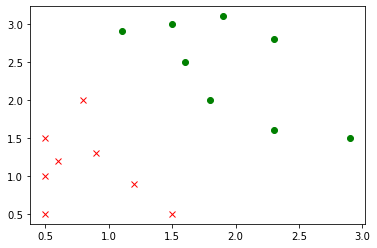

In [4]:
positive = X[label[0:,0] == 1]
negative = X[label[0:,0] == 0]

plt.plot(positive[:,0], positive[:, 1], "go")
plt.plot(negative[:,0], negative[:, 1], "rx") # take the x and y of all samples

In [5]:
num_sample = X.shape[0]
num_feature = X.shape[1]
num_output = 1

batch_size = num_sample # 一次性全部

# insert a new dim before dim 0  # tip 多画图，图像记忆以后就容易调用了
X_hat = np.insert(X, 0, values = 1, axis = 1) # https://www.tutorialspoint.com/numpy/numpy_insert.htm

# create a W matrix, and initialize it with a random normal distribution
W = np.random.normal(0, 1, size = (1+num_feature, num_output))

lr = 0.1
epochs = 1000


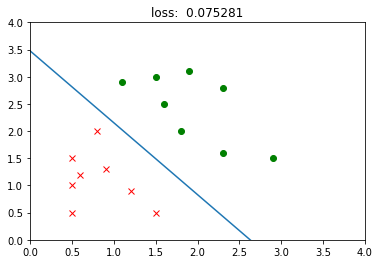

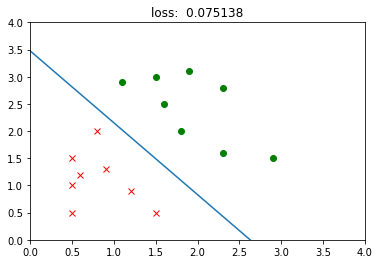

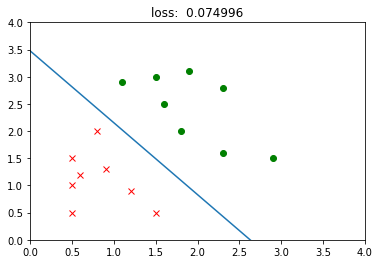

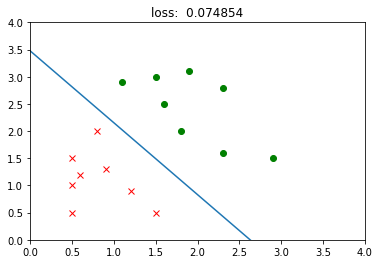

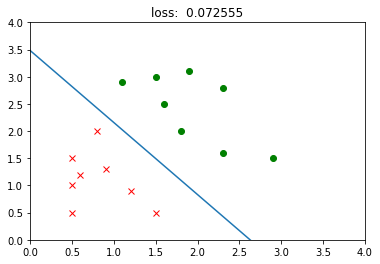

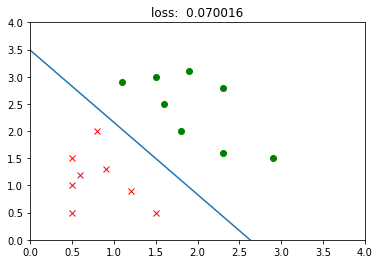

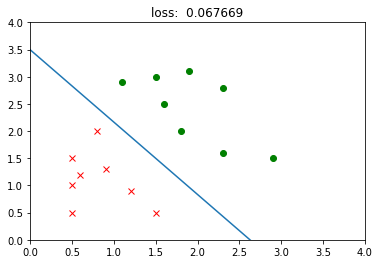

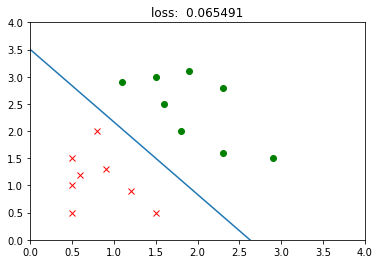

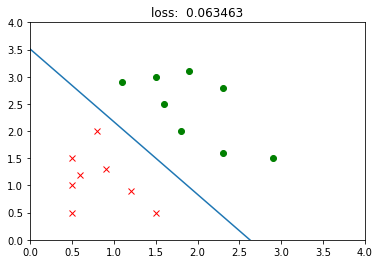

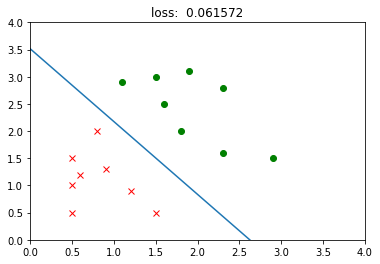

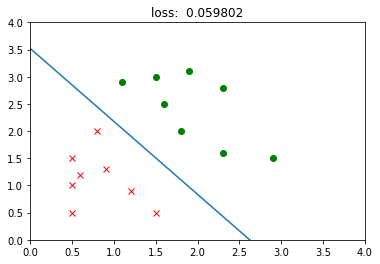

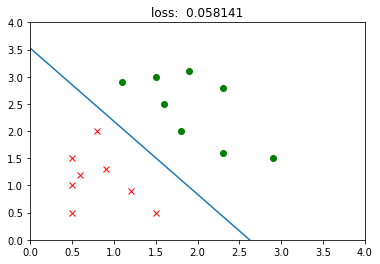

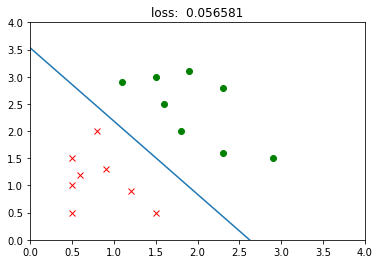

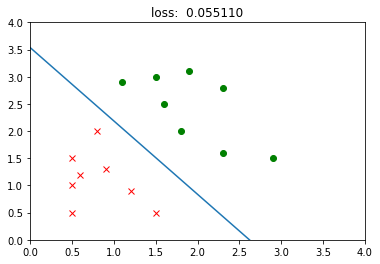

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) # why z is better. mnemonic 

for i in range(epochs):
    predict = X_hat @ W    
    probability = sigmoid(predict)

    loss = -np.sum(label * np.log(probability) + (1 - label) * np.log(1 - probability)) / batch_size
    
    del_predict = (probability - label) / batch_size
    
    # matrix multiplication
    del_W = X_hat.T @ del_predict
    
    W -= lr * del_W
    
    # for visualization
    if ((i + 1) % 100 == 0) or (i % 5 == 0 and i / 5 <= 3):
        predict = X_hat @ W
        probability = sigmoid(predict)
         
        posititve = X[probability[:,0] >= 0.5]
        negative = X[probability[:,0] < 0.5]
        
        bias, theta0, theta1 = W
        
        tx = np.array([0,5])
        ty = -(tx * theta0 +  bias) / theta1
        
        plt.title(f"loss: {loss: 3f}")
        plt.plot(positive[:,0], positive[:,1], "go") # plt.plot draws point
        plt.plot(negative[:,0], negative[:,1], "rx")
        plt.plot(tx, ty)                             # plt.plot also draws line.
        
        plt.axis([0,4,0,4])
        plt.pause(0.01)
        
        
# 先做更新，更新完后再画图 